In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [25]:
nteecc_map = {
    'B01': 'Advocacy',
    'B012': 'Advocacy',
    'B013': 'Advocacy',
    'B014': 'Advocacy',
    'B015': 'Advocacy',
    'B016': 'Advocacy',
    'B017': 'Advocacy',
    'B018': 'Advocacy',
    'B019': 'Advocacy',
    'B02': 'Technical Assistance',
    'B022': 'Technical Assistance',
    'B023': 'Technical Assistance',
    'B024': 'Technical Assistance',
    'B025': 'Technical Assistance',
    'B026': 'Technical Assistance',
    'B027': 'Technical Assistance',
    'B028': 'Technical Assistance',
    'B029': 'Technical Assistance',
    'B03': 'Professional Association',
    'B032': 'Professional Association',
    'B033': 'Professional Association',
    'B034': 'Professional Association',
    'B035': 'Professional Association',
    'B036': 'Professional Association',
    'B037': 'Professional Association',
    'B038': 'Professional Association',
    'B039': 'Professional Association',
    'B05': 'Research',
    'B052': 'Research',
    'B053': 'Research',
    'B054': 'Research',
    'B057': 'Research',
    'B058': 'Research',
    'B059': 'Research',
    'B11': 'Single Support Fundraising',
    'B112': 'Single Support Fundraising',
    'B113': 'Single Support Fundraising',
    'B114': 'Single Support Fundraising',
    'B115': 'Single Support Fundraising',
    'B116': 'Single Support Fundraising',
    'B117': 'Single Support Fundraising',
    'B118': 'Single Support Fundraising',
    'B119': 'Single Support Fundraising',
    'B12': 'Fundraising',
    'B122': 'Fundraising',
    'B123': 'Fundraising',
    'B124': 'Fundraising',
    'B125': 'Fundraising',
    'B126': 'Fundraising',
    'B127': 'Fundraising',
    'B128': 'Fundraising',
    'B129': 'Fundraising',
    'B19': 'Support NEC',
    'B192': 'Support NEC',
    'B193': 'Support NEC',
    'B194': 'Support NEC',
    'B195': 'Support NEC',
    'B196': 'Support NEC',
    'B197': 'Support NEC',
    'B198': 'Support NEC',
    'B199': 'Support NEC',
    'B2': 'K-12 Schools',
    'B20': 'K-12 Schools',
    'B21': 'Preschools',
    'B23': 'Preschools',
    'B24': 'Elementary Schools',
    'B25': 'High Schools',
    'B28': 'Special Education',
    'B26': 'Special Education',
    'B29': 'Charter Schools',
    'B30': 'Vocational Schools',
    'B40': 'Higher Education',
    'B41': 'Two-Year Colleges',
    'B42': 'Undergraduate Colleges',
    'B43': 'Universities',
    'B50': 'Graduate and Professional Schools',
    'B58': 'Graduate and Professional Schools',
    'B60': 'Adult Education',
    'B62': 'Adult Education',
    'B70': 'Libraries',
    'B704': 'Libraries',
    'B72': 'Libraries',
    'B71': 'Libraries',
    'B80': 'Student Services',
    'B804': 'Student Services',
    'B805': 'Student Services',
    'B82': 'Scholarship',
    'B824': 'Scholarship',
    'B825': 'Scholarship',
    'B83': 'Fraternities',
    'B834': 'Fraternities',
    'B84': 'Alumni Association',
    'B844': 'Alumni Association',
    'B845': 'Alumni Association',
    'B9': 'Education Services',
    'B90': 'Education Services',
    'B91': 'Education Services',
    'B09': 'Education Services',
    'B92': 'Remedial Reading',
    'B92J': 'Remedial Reading',
    'B94': 'Parent Teacher Groups',
    'B99': 'Not Elsewhere Classified'
}

Additional Assignments:

B26: Special Education - Bilingual Programs assigned to Special Education

B71: Public Libraries - Assigned to Libraries

B72: School Libraries - Assigned to Libraries

B91: Drop-Out Prevention/Retention Services assigned to Educational Services

B58: Theological School/Education assigned to Graduate/Professional Schools: Separately Constituted

B23: Not found in NTEE manual but has pre-school in name so assigned to Preschools

B09: Appears to be a misinput B90 since one of the two orgs classified is a B90 org on Guidestar hence assigned to Education Services

B62: Educational Institutions and Related Activities / Adult, Continuing Education (B62) assigned to Adult Education

All other orgs in the other category are individually assigned to the correct categories by inspection.


In [26]:
# 2022-2024 Data

df1 = pd.read_stata("/Users/daniellancet/Desktop/Edu_Org_Ecology/Data/BMF_ED_2224.dta")


In [27]:
df1['f990_total_assets_recent']

0               0.0
1            2000.0
2               0.0
3         7251288.0
4           67593.0
            ...    
234847          0.0
234848    1067066.0
234849          0.0
234850     293423.0
234851     115306.0
Name: f990_total_assets_recent, Length: 234852, dtype: float64

In [28]:
rename_dict = {"f990_org_addr_state": "state", "f990_org_addr_city": "city", "f990_total_assets_recent": "total_assets", "f990_total_income_recent": "total_income", "org_name_current": "name", "org_ruling_year": "ruleyear", "f990_total_revenue_recent": "totrev"}

def create_main_column(map):
    def main_col(ntee):
        if ntee in map.keys():
            return map[ntee]
        else:
            return "Other"
    return main_col

def clean_df(df, rename_dict, main_dict): 
    
    # Remove Non-US States
    bad_states = ["PR", "VI" , "AP", "MP", "AE", "GU", "", "FM", "AS"]

    # PR: Puerto Rico
    # VI: U.S. Virgin Islands
    # AP: Armed Forces Pacific
    # MP: Northern Mariana Islands
    # AE: Armed Forces Europe, the Middle East, and Canada
    # GU: Guam
    # AS: American Samoa
    # FM: Federated States of Micronesia
    # (empty string): Unspecified location (often used as a placeholder)
    
    # Perform Specified Renamings 
    df = df.rename(rename_dict, axis = 1)
    df = df[~df["state"].isin(bad_states)]

    # Merge New York Boroughs
    merge_boroughs  = pd.Series(["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"]).str.upper()
    no_boroughs = df[~df["city"].isin(merge_boroughs)]
    boroughs = df[df["city"].isin(merge_boroughs)]
    boroughs.loc[:, "city"] = "NEW YORK"
    df_lst = [no_boroughs, boroughs]
    df = pd.concat(df_lst)

    # Fix 0 leading eins
    fixed_ein = df["ein"].astype(int).astype(str).apply(lambda x: x if len(x) == 9 else '0' + x)
    df = df.drop(columns = "ein", axis = 1)
    df["ein"] = fixed_ein


    # Add Main Column for processing
    main_func = create_main_column(main_dict)
    df["Main_Category"] = df["ntee_irs"].apply(main_func)


    # Fix NTEE
    df = df[df["ntee_irs"].apply(lambda x: x[0] == 'B')] # Only leading B
    df.loc[df['ein'] == '472146998', 'ntee_irs'] = 'B01'
    df.loc[df['ein'] == '472146998', 'ntee_irs'] = 'B01'
    df.loc[df['ein'] == '474121780', 'ntee_irs'] = 'B05'
    df.loc[df['ein'] == '465114209', 'ntee_irs'] = 'B82'
    df.loc[df['ein'] == '825466464', 'ntee_irs'] = 'B19'
    
    df.loc[df['ntee_irs'] == 'B9O', 'ntee_irs'] = 'B90'
    df.loc[df['ntee_irs'] == 'B3O', 'ntee_irs'] = 'B30'
    df.loc[df['ntee_irs'] == 'B94O', 'ntee_irs'] = 'B94'
    df.loc[df['ntee_irs'] == 'B1', 'ntee_irs'] = 'B01'
    df.loc[df['ntee_irs'] == 'B8', 'ntee_irs'] = 'B82'

    other = df.query("Main_Category == 'Other'")
    non_other = df.query("Main_Category != 'Other'")

    other.loc[:, "ntee_irs"] = other["ntee_irs"].apply(lambda x: x[:3])
    
    df = pd.concat([other, non_other])
     
     
     # Re-Add Main Column
    main_func = create_main_column(main_dict)
    df["Main_Category"] = df["ntee_irs"].apply(main_func)

    # Handle Duplicates: Keeps the first of each ein
    df = df.drop_duplicates(subset = "ein", keep = 'first')

    

    return df

cleaned_df = clean_df(df1, rename_dict, nteecc_map)#.to_csv("cleaned.csv", index = False)


Text(0, 0.5, '')

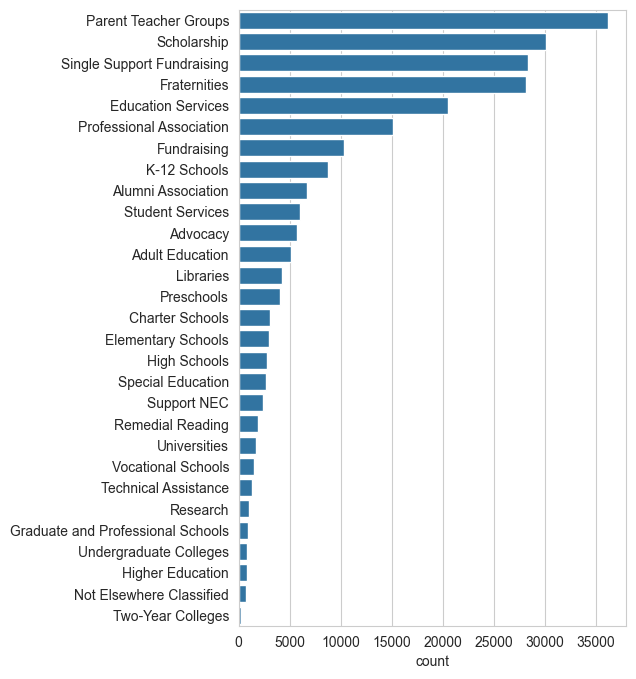

In [29]:
plt.figure(figsize = (5, 8))
sns.barplot(cleaned_df["Main_Category"].value_counts(), orient='h');
plt.ylabel("")

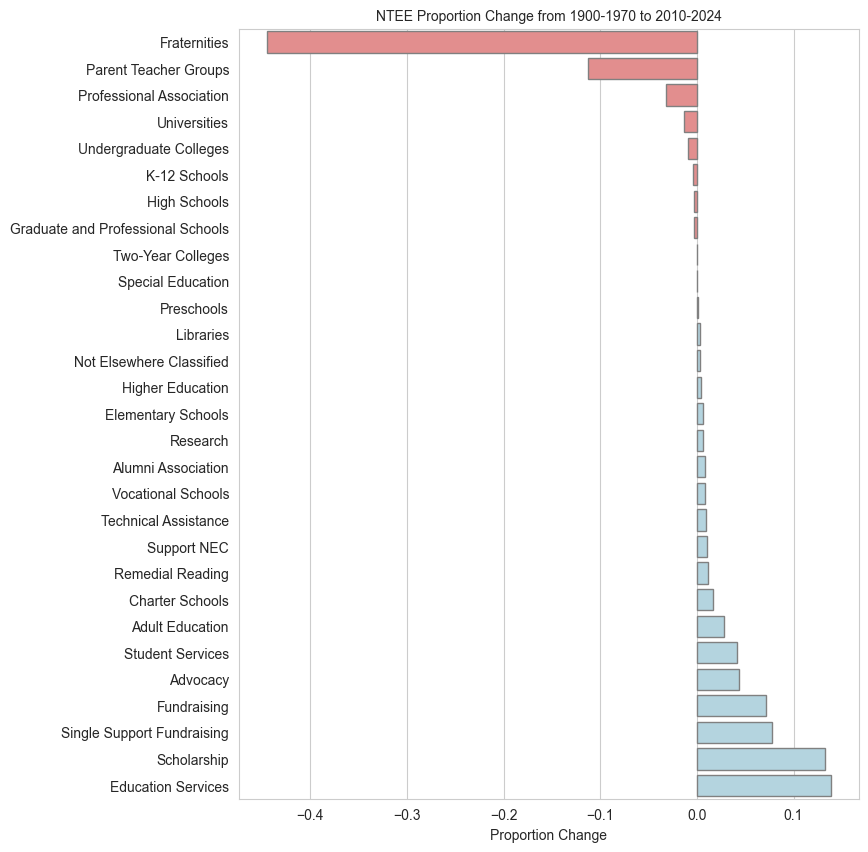

In [30]:
df_2010s = cleaned_df[cleaned_df["ruleyear"].isin([i for i in range(2010, 2024)])]
df_1970s = cleaned_df[cleaned_df['ruleyear'].isin([i for i in range(1900, 1970)])]

def period_proportions(df):
    period_counts = df["Main_Category"].value_counts().sort_index()
    total = period_counts.sum()
    proportions = period_counts / total
    percents = proportions 
    return percents

# Assuming df_2010s and df_1970s are your dataframes
proportion_change = (period_proportions(df_2010s) - period_proportions(df_1970s)).sort_values()

# Create a DataFrame with proportion change and colors
proportion_change_df = pd.DataFrame({
    'Main_Category': proportion_change.index,
    'Proportion_Change': proportion_change.values,
    'Color': ['lightblue' if x > 0 else 'lightcoral' for x in proportion_change]
})

plt.figure(figsize=(8, 10))
sns.barplot(
    data=proportion_change_df, 
    x='Proportion_Change', 
    y='Main_Category', 
    hue='Color', 
    dodge=False, 
    palette=['lightcoral', 'lightblue'], 
    legend=False,
    edgecolor = 'gray'
)
plt.title("NTEE Proportion Change from 1900-1970 to 2010-2024", fontsize = 10)
plt.xlabel("Proportion Change", fontsize = 10)
plt.ylabel("")
plt.show()


